[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Advanced NLP Analysis:
                                                Text  \
0        Bitcoin is reaching new highs in 2023! #BTC   
1   The latest news from Coinbase is quite positive.   
2  Elon Musk's recent tweet has influenced Bitcoi...   
3  The conference in New York will discuss the fu...   
4      Analyzing sentiments towards Bitcoin. #Crypto   

                                 Entities and Tokens  
0  ([Bitcoin, 2023, #], [bitcoin, reaching, new, ...  
1  ([Coinbase], [latest, news, coinbase, quite, p...  
2  ([Elon Musk's, Bitcoin], [elon, musk, recent, ...  
3  ([New York], [conference, new, york, discuss, ...  
4  ([Bitcoin], [analyzing, sentiments, towards, b...  


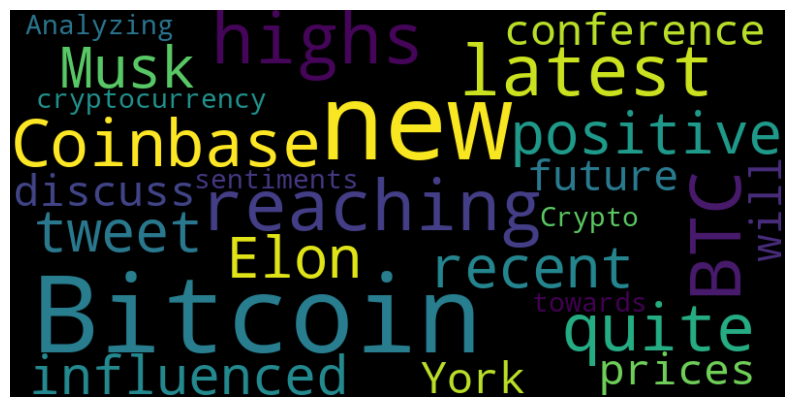

[*********************100%%**********************]  1 of 1 completed


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import spacy
import yfinance as yf
import pandas_ta as ta
import nltk
import warnings

# Suppress TensorFlow deprecation warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module='tensorflow')

# Load spaCy model
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Downloading spaCy model. This may take a while...")
    spacy.cli.download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

# Download NLTK resources
nltk.download('punkt')

# Function to fetch Bitcoin historical data
def get_bitcoin_data(start_date, end_date):
    bitcoin_data = yf.download("BTC-USD", start=start_date, end=end_date)
    return bitcoin_data

# Function to perform advanced NLP analysis using spaCy
def analyze_nlp_advanced(text):
    doc = nlp(text)

    # Extract named entities
    entities = [ent.text for ent in doc.ents]

    # Tokenize text and remove stopwords
    tokens = nltk.word_tokenize(text)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]

    return entities, filtered_tokens

# Function to perform sentiment analysis using VADER
def analyze_sentiment_vader(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_score = sid.polarity_scores(text)['compound']
    return 'Positive' if sentiment_score > 0 else ('Negative' if sentiment_score < 0 else 'Neutral')

# Sample Bitcoin-related tweets with diverse named entities
bitcoin_tweets = [
    "Bitcoin is reaching new highs in 2023! #BTC",
    "The latest news from Coinbase is quite positive.",
    "Elon Musk's recent tweet has influenced Bitcoin prices.",
    "The conference in New York will discuss the future of cryptocurrency.",
    "Analyzing sentiments towards Bitcoin. #Crypto"
]

# Advanced NLP analysis
entities_and_tokens_list = [analyze_nlp_advanced(tweet) for tweet in bitcoin_tweets]

# Display NLP analysis results
nlp_df = pd.DataFrame({'Text': bitcoin_tweets, 'Entities and Tokens': entities_and_tokens_list})
print("\nAdvanced NLP Analysis:")
print(nlp_df)

# Sentiment analysis using VADER
sentiments_vader = [analyze_sentiment_vader(tweet) for tweet in bitcoin_tweets]
sentiment_df_vader = pd.DataFrame({'Text': bitcoin_tweets, 'Sentiment': sentiments_vader})

# Convert sentiment labels to numerical values
sentiment_df_vader['Sentiment Score'] = sentiment_df_vader['Sentiment'].apply(lambda x: 1 if x == 'Positive' else (-1 if x == 'Negative' else 0))

# Generate word cloud
full_text = ' '.join(bitcoin_tweets)
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(full_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Visualize NLP entities
flat_entities = [ent for sublist in entities_and_tokens_list for ent in sublist[0]]
entity_count = pd.Series(flat_entities).value_counts().reset_index()
entity_count.columns = ['Entity', 'Count']
fig = px.bar(entity_count, x='Entity', y='Count', title='Named Entity Recognition')
fig.show()

# Visualize sentiments using VADER
fig = px.bar(sentiment_df_vader, x='Text', y='Sentiment Score', color='Sentiment', title='Sentiment Analysis (VADER)')
fig.update_layout(yaxis=dict(title='Sentiment Score'))
fig.show()

# Plot Bitcoin historical prices and technical analysis
start_date = "2021-01-01"
end_date = "2024-01-09"
bitcoin_data = get_bitcoin_data(start_date, end_date)

# Plot Bitcoin historical prices
fig = px.line(bitcoin_data, x=bitcoin_data.index, y='Close', title='Bitcoin Price Over Time')
fig.show()
